# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
#Your code here
import pandas as pd

df= pd.read_csv('multipleChoiceResponses_cleaned.csv',encoding='latin1')


C:\Users\poari\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, r

In [3]:
df


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26389,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26390,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000076,NaN
26391,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26392,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()


,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [5]:
#Your code here
# H0: mean salary with M = mean salary with B
# Ha: mean salary with M different from mean salary with B
# alpha = 0.05 = 5%


In [6]:
df['FormalEducation'].unique()

array(["Bachelor's degree", "Master's degree", 'Doctoral degree', nan,
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer'], dtype=object)

In [7]:
df['AdjustedCompensation'].describe()

count    4.343000e+03
mean     6.636071e+06
std      4.293996e+08
min     -7.351631e+01
25%      2.036942e+04
50%      5.381217e+04
75%      9.566608e+04
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64

In [60]:
dfB = df.loc[df['FormalEducation'] == "Bachelor's degree"]
dfM = df.loc[df['FormalEducation'] == "Master's degree"]
dfB = dfB['AdjustedCompensation']
dfBach=dfB.copy()
dfBach.dropna(inplace=True)
dfBach
dfM = dfM['AdjustedCompensation']
dfMast=dfM.copy()
dfMast.dropna(inplace=True)
dfMast

3        250000.000
14        36634.400
27        53352.000
31        35419.104
37        80000.000
            ...    
26148     54670.000
26159         1.000
26180     65770.430
26255     89686.950
26378     10000.000
Name: AdjustedCompensation, Length: 1990, dtype: float64

In [61]:
#Your code here
dfBach.describe(),dfMast.describe()

(count    1.107000e+03
 mean     6.488710e+04
 std      3.069359e+05
 min      0.000000e+00
 25%      1.126620e+04
 50%      3.839940e+04
 75%      8.023100e+04
 max      9.999999e+06
 Name: AdjustedCompensation, dtype: float64, count    1.990000e+03
 mean     6.913990e+04
 std      1.355272e+05
 min      0.000000e+00
 25%      2.186800e+04
 50%      5.381217e+04
 75%      9.200000e+04
 max      4.498900e+06
 Name: AdjustedCompensation, dtype: float64)

In [62]:
# max in dfBAch is suspicious
dfBach.sort_values().tail()

419       470000.0
25172     550000.0
21352    1000000.0
995      1000000.0
3024     9999999.0
Name: AdjustedCompensation, dtype: float64

In [63]:
dfBach.drop(index=3024,inplace=True)


In [64]:
dfBach.sort_values().tail()

6377      400000.0
419       470000.0
25172     550000.0
995      1000000.0
21352    1000000.0
Name: AdjustedCompensation, dtype: float64

In [65]:
# new max in dfBAch are also suspicious
list(df.iloc[995]),list(df.iloc[21352]),

(['Male',
  'United States',
  '50.0',
  'Employed full-time',
  nan,
  nan,
  'Yes',
  nan,
  'Researcher',
  'Poorly',
  "Employed by a company that doesn't perform advanced analytics",
  'Python',
  "I don't plan on learning a new ML/DS method",
  'Python',
  'Other',
  'Conferences,Online courses,Stack Overflow Q&A,Textbook',
  nan,
  nan,
  nan,
  nan,
  'Somewhat useful',
  nan,
  nan,
  nan,
  nan,
  nan,
  'Very useful',
  nan,
  nan,
  'Very useful',
  'Somewhat useful',
  nan,
  nan,
  nan,
  'Other (Separate different answers with semicolon)',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  'No',
  "Bachelor's degree",
  'Electrical Engineering',
  '3 to 5 years',
  'Software Developer/Software Engineer',
  'Self-taught',
  0.0,
  20.0,
  80.0,
  0.0,
  0.0,
  0.0,
  'Other (please specify; separate by semi-colon)',
  'Other (please specify; separate by semi-colon)',
  "A master's degree",
  'Tec

In [66]:
dfBach.drop(index=[995,21352],inplace=True)
dfBach.sort_values().tail()

16964    359260.0
7649     371294.5
6377     400000.0
419      470000.0
25172    550000.0
Name: AdjustedCompensation, dtype: float64

In [70]:
dfMast.sort_values().tail()

2546      595884.6
1516     1000000.0
22477    2000000.0
22198    2500000.0
25356    4498900.0
Name: AdjustedCompensation, dtype: float64

In [72]:
# also removing the 4 highest salaries from dfMast
dfMast.drop(index=[1516,22477,22198,25356],inplace=True)
dfMast.sort_values().tail()

6043     350000.0
1340     350000.0
16923    459000.0
16941    500000.0
2546     595884.6
Name: AdjustedCompensation, dtype: float64

In [73]:
dfBach.size,dfMast.size

(1104, 1986)

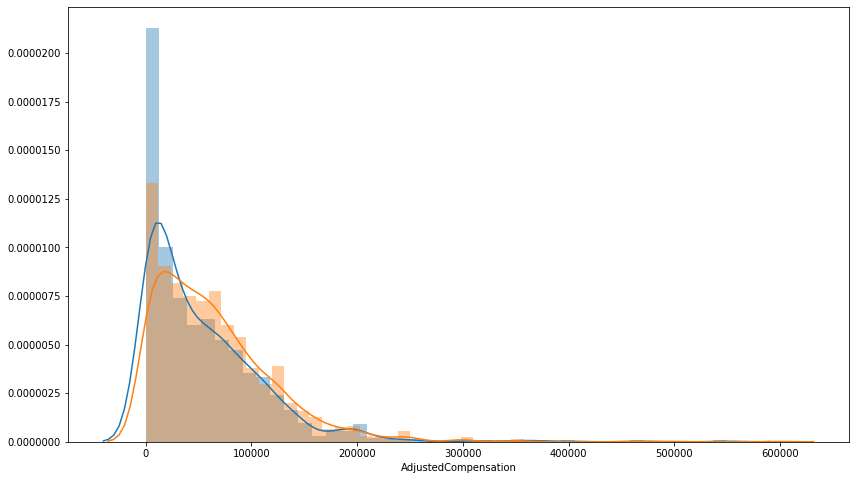

In [74]:
# the 2 samples have different sizes, means and std => Welch's t-test needed
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))
sns.distplot(dfBach)
sns.distplot(dfMast)

plt.show()

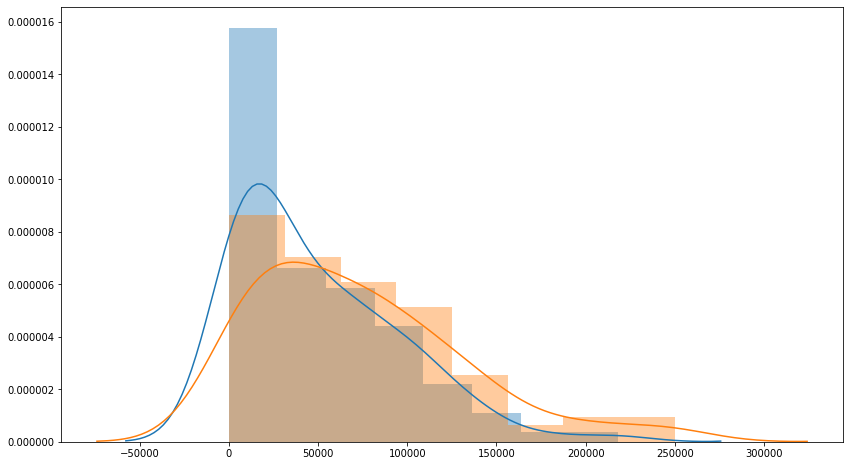

3.1205977877569455 186.7074787971624 0.002091563628907167 1.9727511638819784


In [93]:
# sample from Mast and Bach
import numpy as np
import scipy.stats as stats

a=np.random.choice(dfBach,100) # a = bachelor
b=np.random.choice(dfMast,100) # b = master

plt.figure(figsize=(14,8))
sns.distplot(a)
sns.distplot(b)
plt.show()

# Welch's test

# Calculate Welch's t statistic for two samples.
numerator = a.mean() - b.mean()
denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
t_stat=np.abs(numerator/denominator)

# Calculate the effective degrees of freedom for two samples.
s1 = a.var(ddof=1)
s2 = b.var(ddof=1)
n1 = a.size
n2 = b.size
numerator = (s1/n1 + s2/n2)**2
denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
dof=numerator/denominator

# p_value - 2 tailed test
p = 2*(1-stats.t.cdf(np.abs(t_stat), dof))

# t-critical corresponding to alpha=0.05
t_crit=stats.t.ppf(.975,dof)

print(t_stat,dof,p,t_crit)


In [ ]:
# conclusion:
# p_value < alpha
# t_stat>t_crit
# We can reject H0
# We accept Ha is true: mean salary with Master different from mean salary with Bachelor


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [30]:
#Your code here


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [118]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols
dfANOVA=df[['FormalEducation','AdjustedCompensation']]
dfclean = dfANOVA.dropna()
dfclean2= dfclean.loc[df['AdjustedCompensation']< 500000]
dfclean2.sort_values(by=['AdjustedCompensation']).tail()
print(dfclean2['FormalEducation'].unique())

formula = 'AdjustedCompensation ~ C(FormalEducation) ' 
lm = ols(formula,dfclean2).fit()
lm.summary()
table  = sm.stats.anova_lm(lm,typ=2)
print(table)

["Master's degree" "Bachelor's degree" 'Doctoral degree'
 "Some college/university study without earning a bachelor's degree"
 'I did not complete any formal education past high school'
 'Professional degree' 'I prefer not to answer']
                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.860266e+11     6.0  29.701947  4.496916e-35
Residual            1.420249e+13  4319.0        NaN           NaN


In [ ]:
# interpretation:
# on the right, (PR>F) the probability that the factor is indeed influential. 
# Values less than 0.05 (or whatever we set  𝛼  to) indicate rejection of the null hypothesis. 
# In this case,the factor 'FormalEducation' appear influential, 

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!